### 读取数据、以国家为单位整理数据，去掉无用信息

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,3)

In [138]:
base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"
infected = pd.read_csv(base_url + "time_series_covid19_confirmed_global.csv")
recovered = pd.read_csv(base_url + "time_series_covid19_recovered_global.csv")
deaths = pd.read_csv(base_url + "time_series_covid19_deaths_global.csv")
infected.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [139]:
infected = infected.groupby('Country/Region').sum()
recovered = recovered.groupby('Country/Region').sum()
deaths = deaths.groupby('Country/Region').sum()

infected.head(5)

C:\Users\admin\AppData\Local\Temp\ipykernel_22208\2032693840.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  infected = infected.groupby('Country/Region').sum()
C:\Users\admin\AppData\Local\Temp\ipykernel_22208\2032693840.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  recovered = recovered.groupby('Country/Region').sum()
C:\Users\admin\AppData\Local\Temp\ipykernel_22208\2032693840.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [140]:
infected.drop(columns=['Lat','Long'],inplace=True)
recovered.drop(columns=['Lat','Long'],inplace=True)
deaths.drop(columns=['Lat','Long'],inplace=True)

### 任务1：将5-6个不同国家的Rt图绘制在一张图上进行比较+并排使用多个图表比较

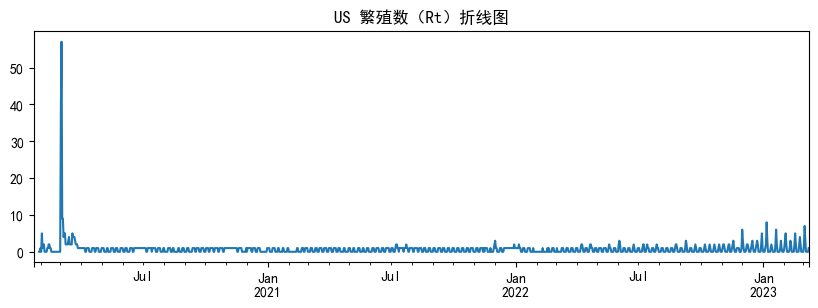

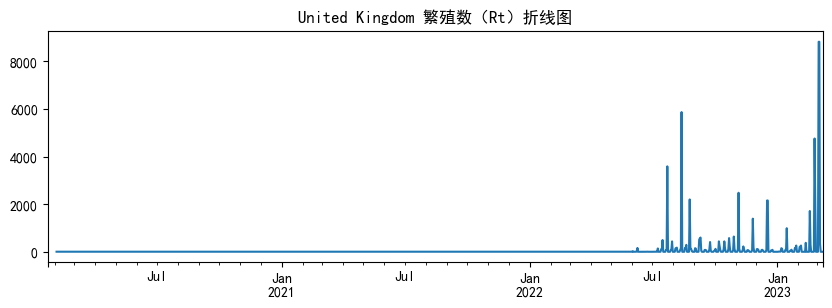

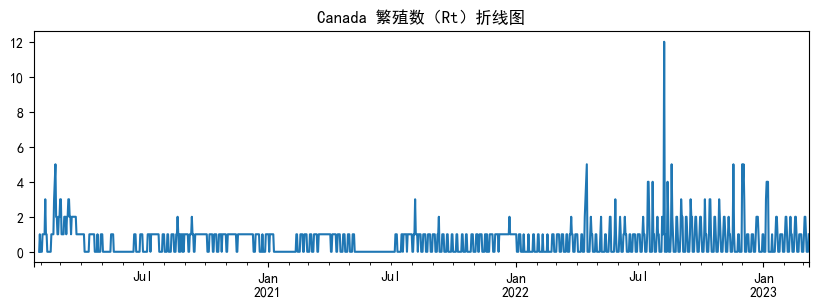

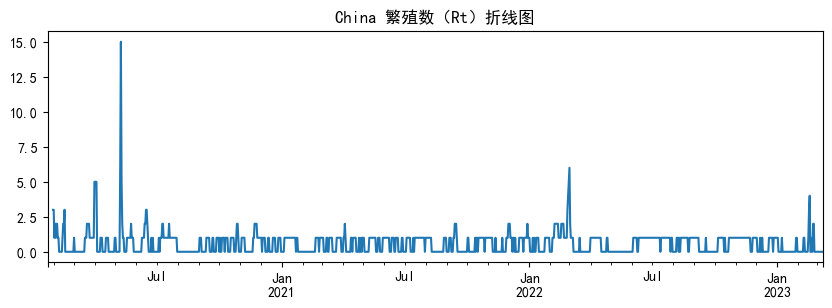

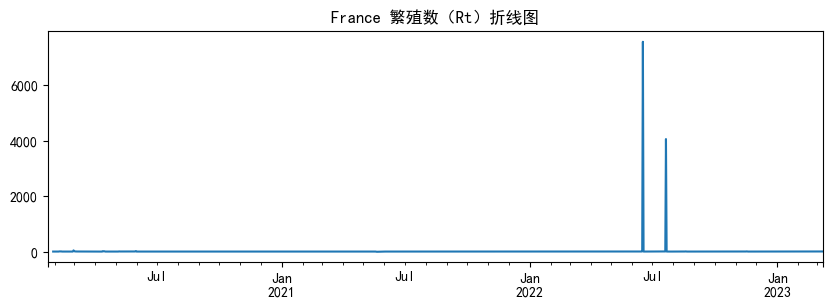

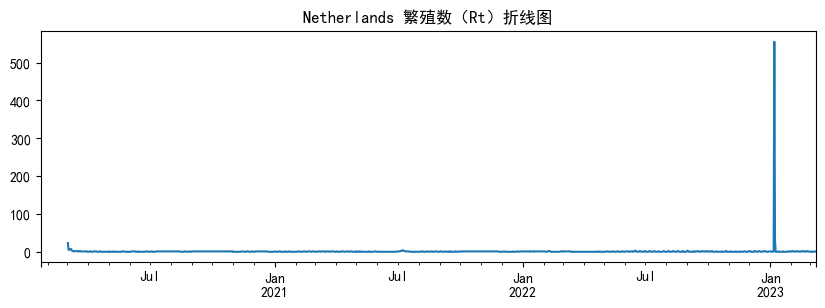

In [142]:
# 构造国家感染、新增、康复、死亡、繁殖数表
def mkframe(country):
    df = pd.DataFrame({ 'infected' : infected.loc[country] ,
                        'ninfected' : infected.loc[country].diff() ,
                        'recovered' : recovered.loc[country],
                        'deaths' : deaths.loc[country]})
    df.index = pd.to_datetime(df.index)

    # 计算Rt在表中存储为一列
    df['Rt'] = df['ninfected'].rolling(8).apply(lambda x: x[4:].sum()//x[:4].sum())
    # 将Rt列中无穷大值替换成缺失值，然后以前向填充的方式填充空值，更新Rt列
    df['Rt']=df['Rt'].replace(np.inf,np.nan).fillna(method='pad')
    df['Rt'].plot()
    plt.rcParams['font.sans-serif']=['SimHei']      # 显示汉字
    plt.title(country+' 繁殖数（Rt）折线图')
    plt.show()
    return df

# 并排使用多个图表比较
us = mkframe('US')
uk = mkframe('United Kingdom')
can = mkframe('Canada')
cn = mkframe('China')
fra = mkframe('France')
nld = mkframe('Netherlands')

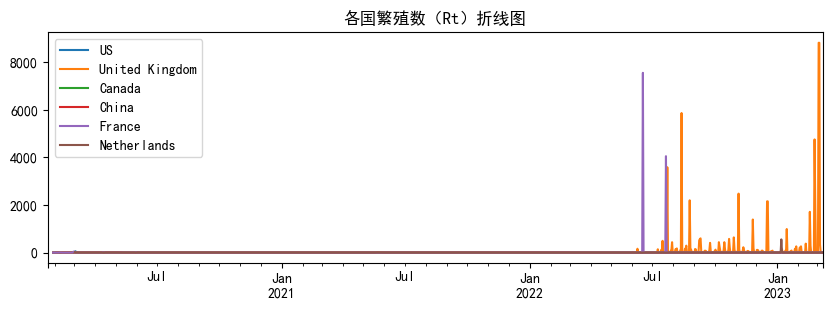

In [143]:
# 封装6个国家的繁殖数Rt
rts=pd.DataFrame({ 'US' : us['Rt'] ,
                   'United Kingdom' : uk['Rt'] ,
                   'Canada' : can['Rt'] ,
                   'China' : cn['Rt'] ,
                   'France' : fra['Rt'] ,
                   'Netherlands' : nld['Rt']})

# 绘制在一张图上进行比较，因为英国、法国、荷兰后期的繁殖数太高了，放在一起别的国家近乎一条直线
rts.plot()
plt.title('各国繁殖数（Rt）折线图')
plt.show()

### 任务2：了解死亡和康复人数与感染病例数的相关性

In [144]:
# 计算全球总感染人数、康复人数、死亡人数
infsum = infected.sum()
recsum = recovered.sum()
deasum = deaths.sum()
ird=pd.DataFrame({ 'infected' : infsum ,
                   'recovered' : recsum,
                   'deaths' : deasum})
ird.index = pd.to_datetime(ird.index)
ird.corr()

,infected,recovered,deaths
infected,1.000000,-0.349824,0.939763
recovered,-0.349824,1.000000,-0.217285
deaths,0.939763,-0.217285,1.000000


### 任务3：通过直观地关联感染率和死亡率并寻找一些异常情况，了解疾病的持续时间。

In [260]:
countries = pd.read_csv(base_url + "../UID_ISO_FIPS_LookUp_Table.csv")
# 表格中州空缺行为国家总数据，以此提取世界总人口
pop = countries[countries['Province_State'].isna()]['Population'].sum()
pop

7744776836.0

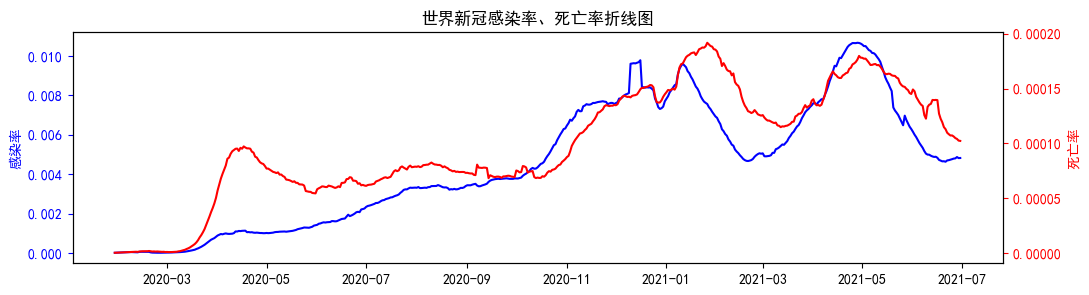

In [269]:
# 计算全球每日感染率、死亡率
ird['pinfected'] = ird['infected'].diff().rolling(7).mean() *100 / pop
ird['pdeaths'] = ird['deaths'].diff().rolling(7).mean() *100 / pop

# 为方便观察，截取21年7月之前的数据画图
fig, ax1 = plt.subplots()
ax1.plot(ird[ird.index<"2021-07-01"]['pinfected'], 'b-')
ax1.set_ylabel('感染率', color='blue')

ax2 = ax1.twinx()
ax2.plot(ird[ird.index<"2021-07-01"]['pdeaths'],'r-')
ax2.set_ylabel('死亡率', color='red')

ax1.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='red')

plt.title('世界新冠感染率、死亡率折线图')
plt.rcParams["figure.figsize"] = (12,3)
plt.show()

#### 上图可见，感染率和死亡率有相似的趋势，死亡率波动发生在感染率变化之后，有大约1/3时间刻度的推迟
#### 一格时间刻度为两个月，由此推断，疾病持续时间约为20天

### 任务4：计算死亡率及其随时间的变化。在进行计算之前，您可能需要考虑疾病的持续时间（以天为单位）来转换一个时间序列

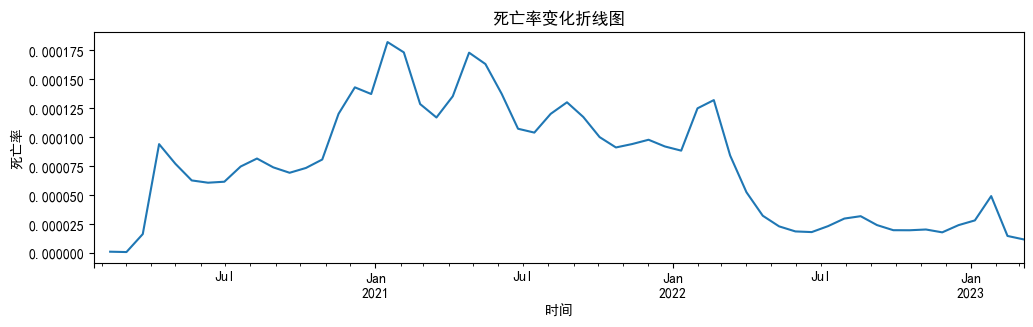

In [293]:
start_date = "Jan 22, 2020"
end_date = "Mar 9, 2023"
# 以20天为步长转换时间序列
idx = pd.date_range(start_date,end_date,freq="20d")
ird.loc[ird.index.isin(idx), 'pdeaths'].plot()
plt.title("死亡率变化折线图")
plt.xlabel("时间")
plt.ylabel("死亡率")
plt.show()
